In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
import statsmodels.api as sm
import random
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
random.seed(123)

In [126]:
songs_df = pd.read_csv('songs.csv')

songs_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [127]:
numerical_cols = [cname for cname in songs_df.columns if songs_df[cname].dtype in ['int64', 'float64']]
numerical_cols.remove('mode')
numerical_cols.remove('popularity')
print("Variables numericas: ",numerical_cols)
print("Cantidad: ", len(numerical_cols))

Variables numericas:  ['duration_ms', 'year', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
Cantidad:  12


In [128]:
# Identificamos variables categoricas y numericas
categorical_cols = [cname for cname in songs_df.columns if songs_df[cname].dtype in ["object", "bool"]]
categorical_cols.append('mode')
print("Variables categoricas: ",categorical_cols)
print("Cantidad: ", len(categorical_cols))

Variables categoricas:  ['artist', 'song', 'explicit', 'genre', 'mode']
Cantidad:  5


In [129]:
categorical_cols.remove('mode')
categorical_cols.remove('song')
songs_df.pop('song')
print(categorical_cols)
print(songs_df.columns)
songs_df = pd.get_dummies(songs_df, columns=['artist', 'explicit', 'genre'])

['artist', 'explicit', 'genre']
Index(['artist', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')


In [130]:
# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
target = songs_df.pop("popularity")
data = songs_df
print(data)


      duration_ms  year  danceability  energy  key  loudness  mode  \
0          211160  2000         0.751   0.834    1    -5.444     0   
1          167066  1999         0.434   0.897    0    -4.918     1   
2          250546  1999         0.529   0.496    7    -9.007     1   
3          224493  2000         0.551   0.913    0    -4.063     0   
4          200560  2000         0.614   0.928    8    -4.806     0   
...           ...   ...           ...     ...  ...       ...   ...   
1995       181026  2019         0.842   0.734    1    -5.065     0   
1996       178426  2019         0.552   0.702    9    -5.707     1   
1997       200593  2019         0.847   0.678    9    -8.635     1   
1998       171029  2019         0.741   0.520    8    -7.513     1   
1999       215280  2019         0.695   0.762    0    -3.497     1   

      speechiness  acousticness  instrumentalness  ...  genre_rock, blues  \
0          0.0437        0.3000          0.000018  ...                  0   
1    

In [131]:
random.seed(123)
data_train, data_test, target_train, target_test = train_test_split(data, target,test_size=0.3,train_size=0.7)

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     1.495
Date:                Sun, 05 May 2024   Prob (F-statistic):           5.86e-08
Time:                        22:10:08   Log-Likelihood:                -5646.5
No. Observations:                1400   AIC:                         1.269e+04
Df Residuals:                     703   BIC:                         1.634e+04
Df Model:                         696                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

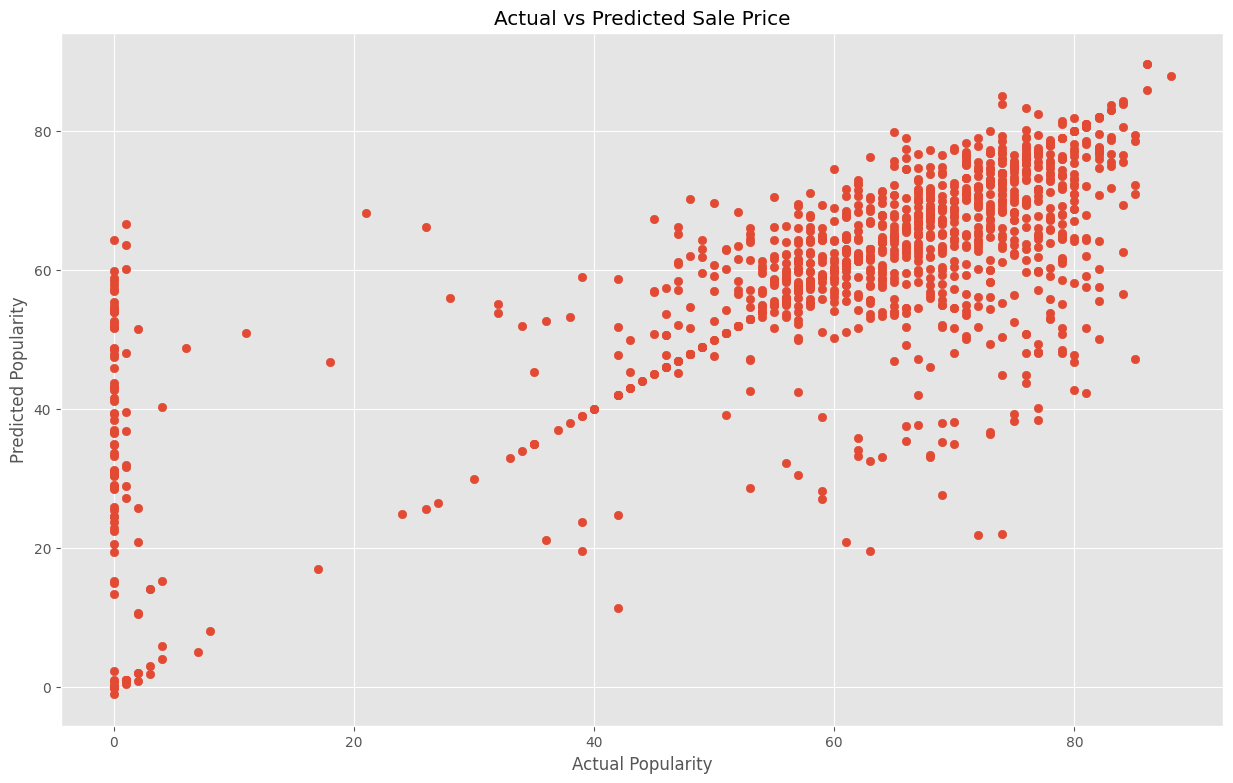

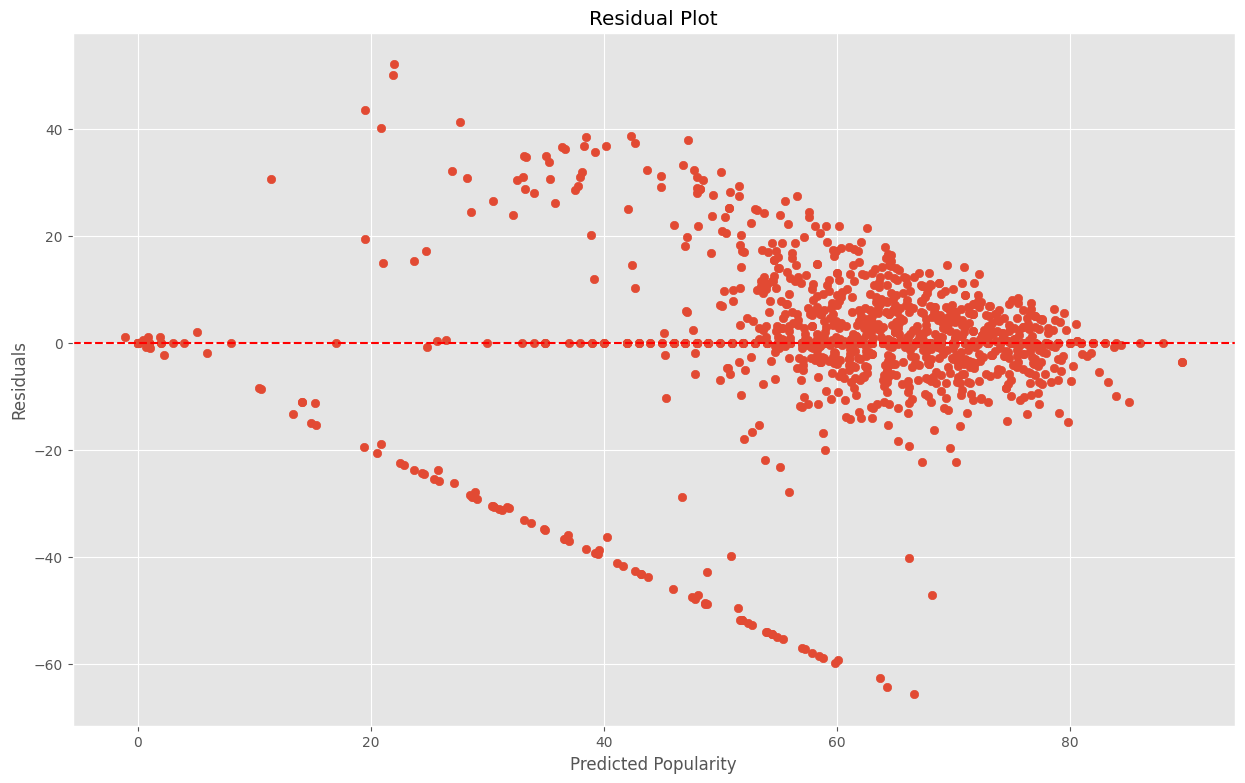

In [132]:
# Añadir una constante para el término de intercepción
X_train_const = sm.add_constant(data_train)

# Modelo de regresión lineal
model = sm.OLS(target_train, X_train_const).fit()

# Resumen del modelo
print(model.summary())

# Hacer predicciones
predictions = model.predict(X_train_const)

# Gráfico de dispersión y línea de regresión
plt.scatter(target_train, predictions)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Sale Price')
plt.show()

# Gráfico de residuos
residuals = target_train - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Popularity')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [133]:
# Añadir una constante para el término de intercepción
X_train_const_VIF = sm.add_constant(data_train[numerical_cols])

# Modelo de regresión lineal
model_VIF = sm.OLS(target_train, X_train_const_VIF).fit()

# Resumen del modelo
print(model_VIF.summary())

# Hacer predicciones
predictions = model_VIF.predict(X_train_const_VIF)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_train[numerical_cols].values, i) for i in range(data_train[numerical_cols].shape[1])]
vif["features"] = data_train[numerical_cols].columns

print(vif)

# Calculate R-squared
r_squared = model_VIF.rsquared
print('R-squared:', r_squared)

# Calculate Adjusted R-squared
adjusted_r_squared = model_VIF.rsquared_adj
print('Adjusted R-squared:', adjusted_r_squared)
# Check for overfitting
predictions_val = model_VIF.predict(sm.add_constant(data_test[numerical_cols]))
mse_train = mean_squared_error(target_train, predictions)
mse_val = mean_squared_error(target_test, predictions_val)

print('Training MSE:', mse_train)
print('Validation MSE:', mse_val)

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.110
Date:                Sun, 05 May 2024   Prob (F-statistic):              0.347
Time:                        22:10:09   Log-Likelihood:                -6275.6
No. Observations:                1400   AIC:                         1.258e+04
Df Residuals:                    1387   BIC:                         1.265e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              130.1897    219.040  

MSE (test): 565.1232465994398
MAE (test): 15.66965449148703
RMSE (test): 23.772321018349047


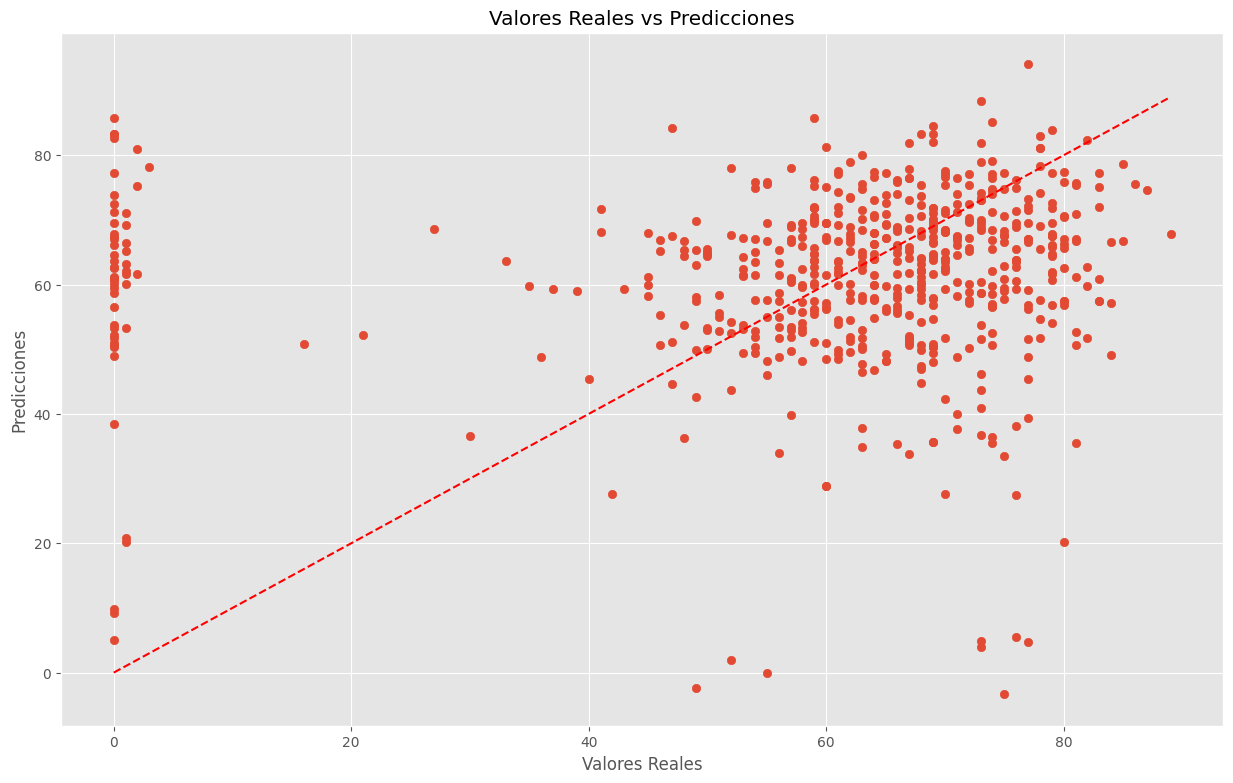

In [134]:
X_test_const = sm.add_constant(data_test)

# Calcular las predicciones del modelo en el conjunto de prueba
y_pred_test = model.predict(X_test_const)

# Calcular el MSE en el conjunto de prueba
mse_test = mean_squared_error(target_test, y_pred_test)
print("MSE (test):", mse_test)

# Calcular el MAE en el conjunto de prueba
mae_test = mean_absolute_error(target_test, y_pred_test)
print("MAE (test):", mae_test)

# Calcular el RMSE en el conjunto de prueba
rmse_test = np.sqrt(mse_test)
print("RMSE (test):", rmse_test)

# Crear un gráfico de dispersión de los valores reales vs las predicciones
plt.scatter(target_test, y_pred_test)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')

# Dibujar una línea diagonal (indicando un modelo perfecto)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], color='red', linestyle='--')

plt.show()

In [135]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Use cross-validation
scores = cross_val_score(model, data_train, target_train, cv=5, scoring='neg_mean_squared_error')

# Take the square root and make positive (because cross_val_score returns negative values for MSE)
rmse_scores = np.sqrt(-scores)

print("RMSE Scores:", rmse_scores)
print("RMSE Mean:", rmse_scores.mean())
print("RMSE Standard Deviation:", rmse_scores.std())

RMSE Scores: [20.05002992 22.24058847 20.40375469 22.44061577 21.12311416]
RMSE Mean: 21.25162060395936
RMSE Standard Deviation: 0.9561357254198212


In [136]:
from sklearn.feature_selection import RFE

model = Lasso(alpha=0.1)
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(data_train, target_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False Fal

MSE (test): 429.01221569569066
MAE (test): 13.975751762534685
RMSE (test): 20.71261006478157


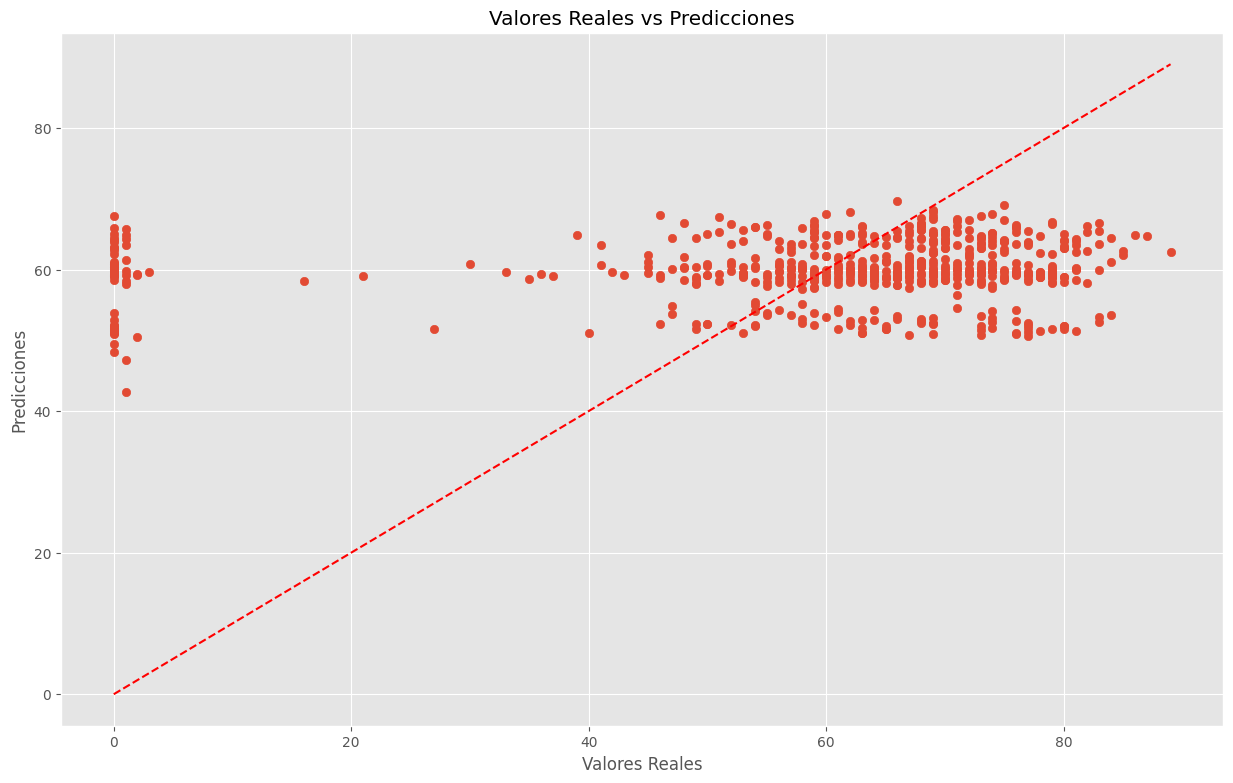

In [137]:

# Define the model
model = Lasso(alpha=0.1)

# Fit the model
model.fit(data_train, target_train)

# Make predictions
y_pred_test = model.predict(data_test)

# Calculate MSE and RMSE
mse_test = mean_squared_error(target_test, y_pred_test)
print("MSE (test):", mse_test)
mae_test = mean_absolute_error(target_test, y_pred_test)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse_test)
print("RMSE (test):", rmse_test)

# Plot the predictions
plt.scatter(target_test, y_pred_test)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')

# Dibujar una línea diagonal (indicando un modelo perfecto)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], color='red', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.110
Date:                Sun, 05 May 2024   Prob (F-statistic):              0.347
Time:                        22:10:37   Log-Likelihood:                -6275.6
No. Observations:                1400   AIC:                         1.258e+04
Df Residuals:                    1387   BIC:                         1.265e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              130.1897    219.040  

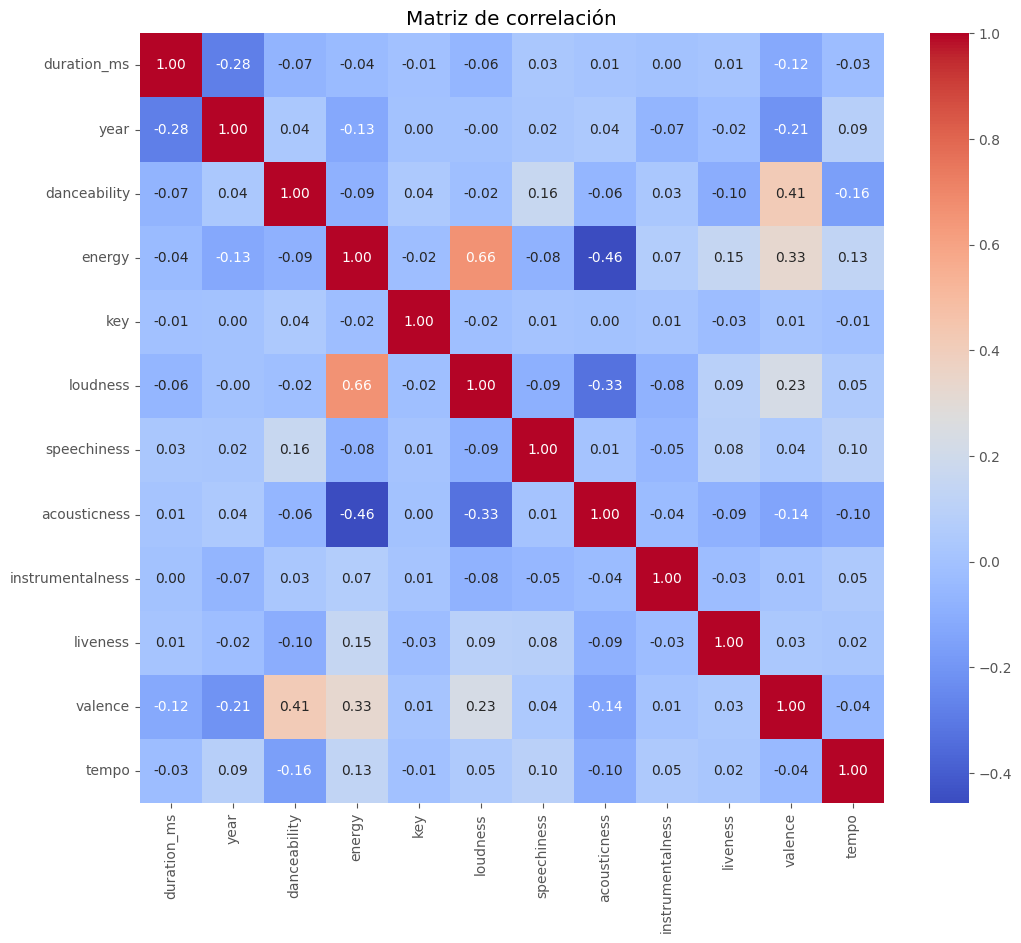

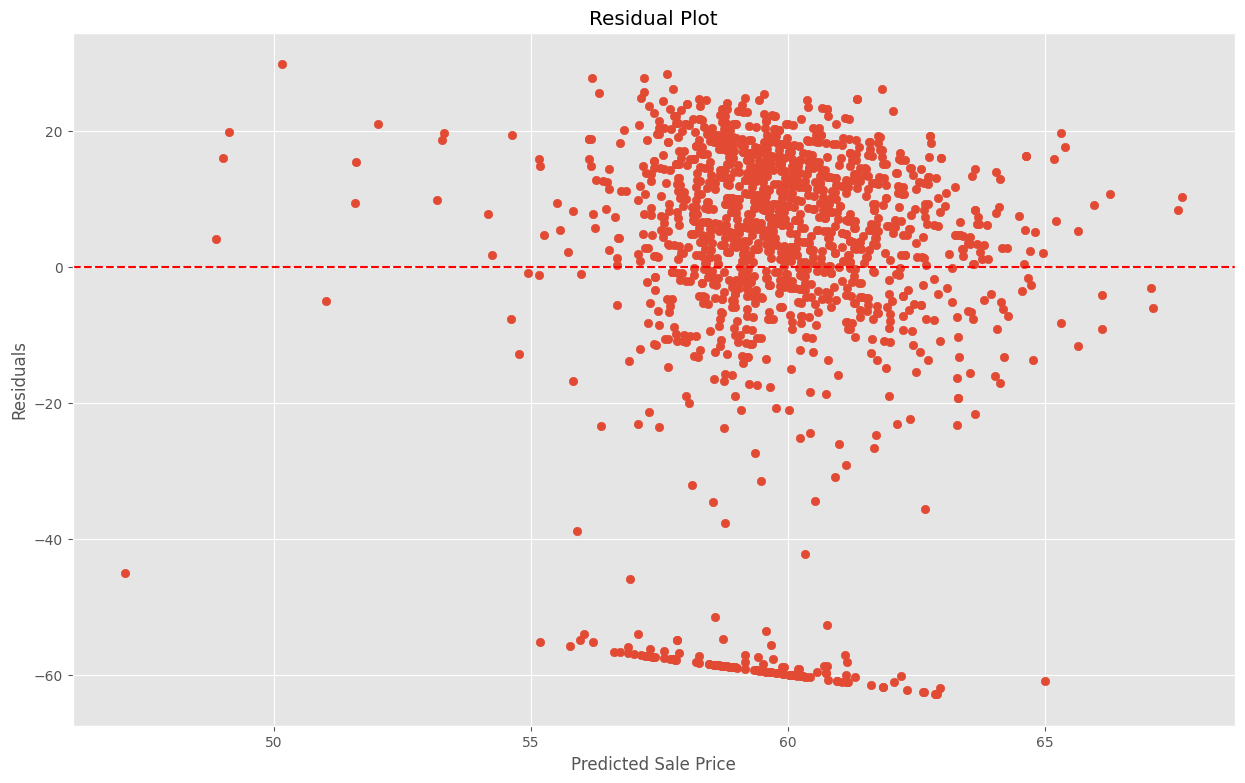


R^2 en los datos de prueba: 0.0005679008588811429


In [138]:
# Añadir una constante para el término de intercepción
X_train_const_VIF = sm.add_constant(data_train[numerical_cols])

# Modelo de regresión lineal
model_VIF = sm.OLS(target_train, X_train_const_VIF).fit()

# Resumen del modelo
print(model_VIF.summary())

# Análisis de multicolinealidad (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = data_train[numerical_cols].columns
vif_data["VIF"] = [variance_inflation_factor(data_train[numerical_cols].values, i) for i in range(len(data_train[numerical_cols].columns))]
print("\nAnálisis de multicolinealidad (VIF):")
print(vif_data)

# Matriz de correlación
correlation_matrix = data_train[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Matriz de correlación")
plt.show()

# Análisis de residuos
residuals = target_train - model_VIF.predict(X_train_const_VIF)
plt.scatter(model_VIF.predict(X_train_const_VIF), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Evaluar el modelo en los datos de prueba
X_test_const_VIF = sm.add_constant(data_test[numerical_cols])
test_predictions = model_VIF.predict(X_test_const_VIF)
test_residuals = target_test - test_predictions
test_r_squared = r2_score(target_test, test_predictions)
print("\nR^2 en los datos de prueba:", test_r_squared)
